# Introducción

Cuando una sociedad se expone a una epidemía infecto contagiosa, además de las medidas oficiales para controlar su dispersión esta

In [1]:
from Simulacion2 import Simulacion
from Simulacion3 import SimulacionAgrupada
import math
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def PlotSimulacion(
        ax1,
        ax2,
        titulo : str,
        historial_infectados : list[int],
        historial_satisfaccion : list[float],
        historial_asistencias : list[int],
        simulacion : Simulacion,
):
    ax1.plot(historial_infectados, label='Infectados')
    ax1.plot(historial_satisfaccion, label='Satisfacción')
    asistencias_posibles = len(simulacion.asistencias_posibles())
    ax1.plot([x/asistencias_posibles * simulacion.n for x in historial_asistencias], label='Asistencias')
    ax1.legend()

    m_infectados = max(historial_infectados)
    ax2.plot([x/m_infectados for x in historial_infectados], label = "Infectados reescalados (1 = maximo de infectados)")

    ax1.set_title(titulo)
    ax2.set_title(titulo)
    
    ax2.legend()

    ax1.set_xlabel("Tiempo")
    ax2.set_xlabel("Tiempo")

# Primer paso: Escenario sin oscilaciones

Hay que ajustar el tamaño de la población para llegar a un escenario donde el modelo se estabilice a lo esperable analiticamente

Mayor ruido, se diferencian más del modelo continuo

Parametros fijos

Parámetros:
*  n (int): Número de personas.
*  m (int): Número de actividades / puntos de reunión.
*  til_base (int): Tiempo base que dura el período de enfermedad en latencia. Luego de este tiempo, en cada día el individuo tiene una probabilidad de 0.5 de pasar al estado infectado.
*  tic_base (int): Tiempo base que dura el periodo de enfermedad contagiosa. Luego de este tiempo, en cada día el individuo tiene una probabilidad de 0.5 de recuperarse.
* memoria (float): Coeficiente que se utiliza para actualizar el riesgo percibido para realizar una determinada actividad.
*  max_tolerancia_riesgo (float): Máximo valor que puede tomar la tolerancia al riesgo de un individuo.
*  umbral (float): Umbral de corte de satisfacción para inicializar el grafo.
*  beta (float): Riesgo de contagio. Una persona expuesta a un lugar con A expuestos y B asistentes sigue sana con probabilidad exp(-A/(beta*B)).
*  min_asistencias_para_cerrar (int): Número mínimo de asistencias diarias para mantener una entidad abierta.
*  max_infecciones_para_evitar (int): Número máximo de infecciones que puede tener un individuo en una entidad antes de evitarla.
* politicas_publicas (bool): Indica si se implementan políticas públicas en la simulación.
*  inicial_exposeds : Cantidad de invididuos expuestos al inicio de la simulación.
        

In [2]:
M = 20   # Número de entidades
tiempo = 1000
til_base = 5
tic_base = 5
memoria = 0.5
umbral = 4
contagiosidad = 0.1
max_tolerancia_riesgo = 1e99 # anular el factor del miedo
expuestos_iniciales = 5

Parametro a modificar para llegar a la situación estable

$N$ : Cantidad de personas

In [3]:
def Generar_Escenario_N(N, ax1, ax2) -> tuple[str, list[int], list[int], list[int], Simulacion]:
    np.random.seed(123456)
    simulacion = Simulacion(N, M, til_base, tic_base, memoria, max_tolerancia_riesgo, umbral, fun_contagio = lambda expuestos, asistencias: 1-math.exp(-contagiosidad * expuestos/(asistencias)), initial_exposeds = expuestos_iniciales)
    historial_infectados, historial_satisfaccion, historial_asistencias = simulacion.ejecutar_simulacion(tiempo)
    titulo = f"Simulación con N = {N}"
    return titulo, historial_infectados, historial_satisfaccion, historial_asistencias, simulacion

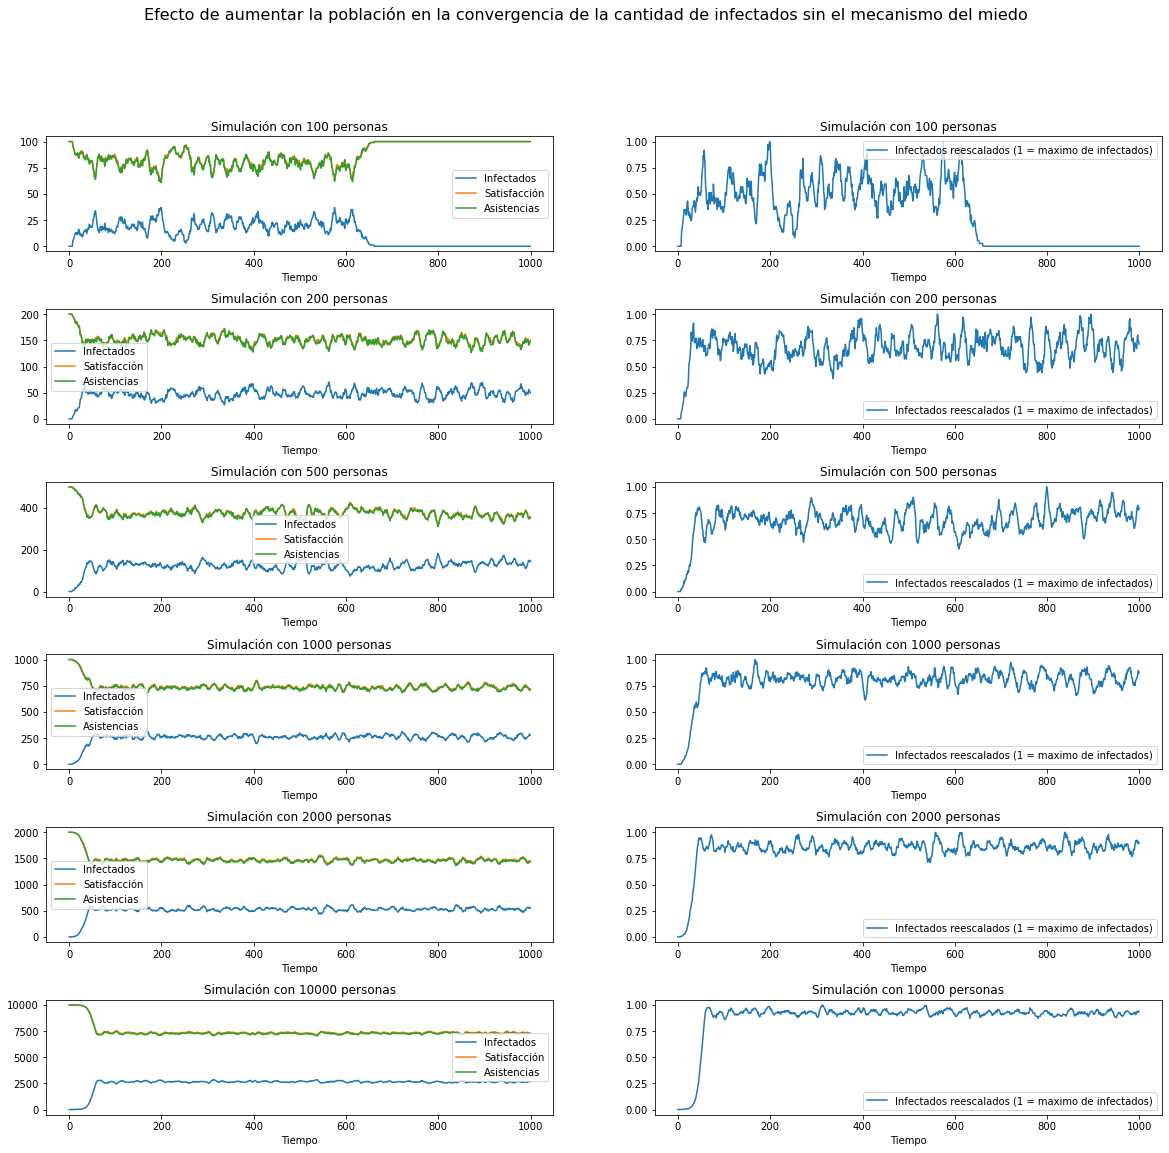

In [4]:
Ns = [100, 200, 500, 1000, 2000, 10000] #, 1000, 2000, 10000]
fig, ax = plt.subplots(nrows=len(Ns), ncols=2, figsize=(20, 3 * len(Ns)), gridspec_kw={'hspace': 0.5})
fig.suptitle('Efecto de aumentar la población en la convergencia de la cantidad de infectados sin el mecanismo del miedo', fontsize=16)
for i, N in enumerate(Ns):
    Probar_Escenario_N(N, ax[i][0], ax[i][1])

plt.show()

Vemos que al aumentar la población tiende al modelo ideal SEIS (para los parametros adecuados)

# Incorporamos el miedo

Parametros fijos

In [5]:
N = 1000
M = 20   # Número de entidades
tiempo = 1000
til_base = 5
tic_base = 5
memoria = 0.5
umbral = 4
contagiosidad = 0.1
expuestos_iniciales = 5

Parametro de interes

In [6]:
max_tolerancia_riesgo = 1e99

Función que corre un escenario

In [7]:
def Probar_Escenario_Riesgo(max_tolerancia_riesgo, ax1, ax2):
    simulacion = Simulacion(N, M, til_base, tic_base, memoria, max_tolerancia_riesgo, umbral, fun_contagio = lambda expuestos, asistencias: 1-math.exp(-contagiosidad * expuestos/(asistencias)))
    historial_infectados, historial_satisfaccion, historial_asistencias = simulacion.ejecutar_simulacion(tiempo)


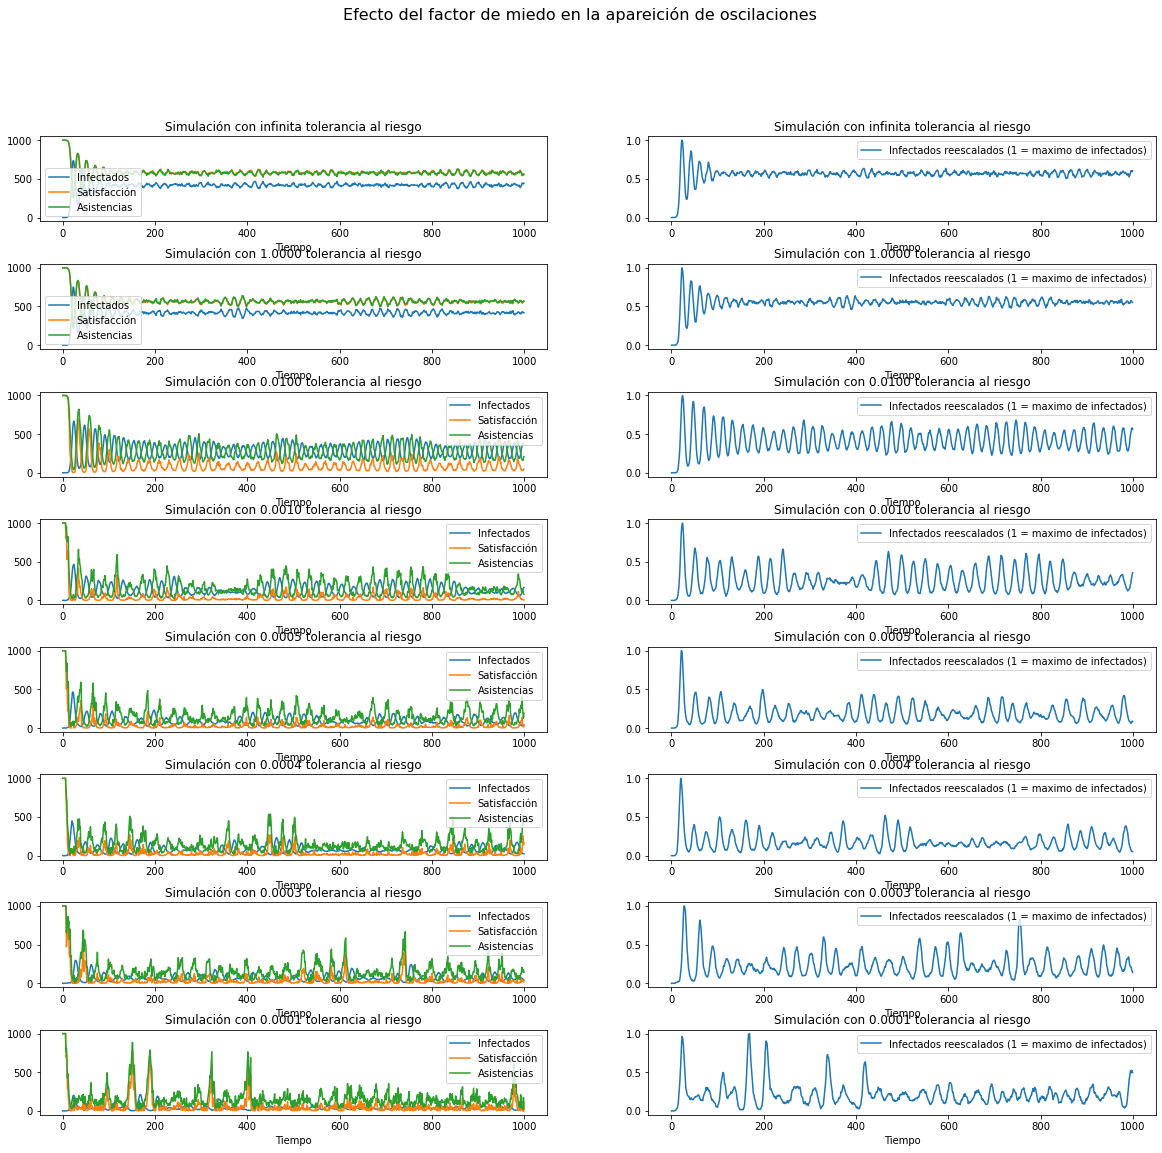

In [8]:
max_tolerancia_riesgos = [1e99, 1, 0.01, 0.001, 0.0005, 0.000375, 0.00025, 0.0001]
fig, ax = plt.subplots(nrows=len(max_tolerancia_riesgos), ncols=2, figsize=(20, 3 * len(Ns)), gridspec_kw={'hspace': 0.5})
fig.suptitle('Efecto del factor de miedo en la apareición de oscilaciones', fontsize=16)
for i, max_tolerancia_riesgo in enumerate(max_tolerancia_riesgos):
    Probar_Escenario_Riesgo(max_tolerancia_riesgo, ax[i][0], ax[i][1])

plt.show()